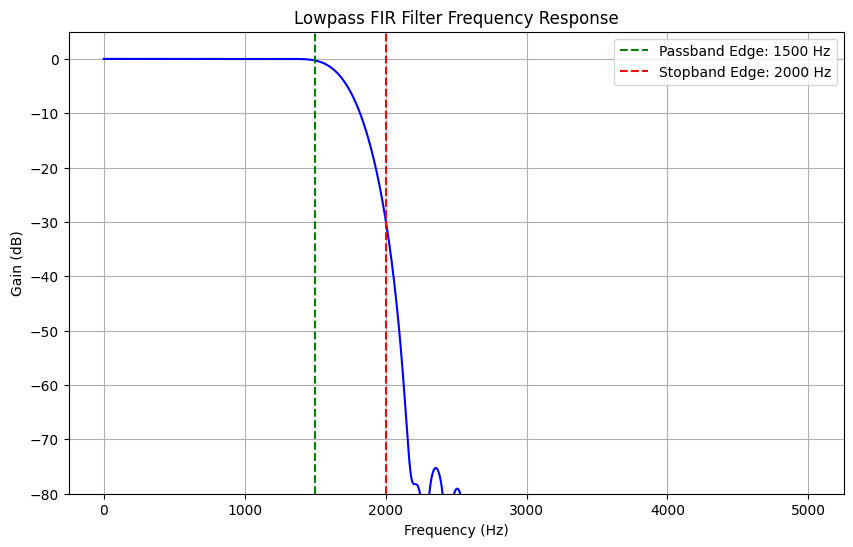

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Define filter specifications
passband_edge = 1500  # Passband edge (Hz)
transition_width = 500  # Transition width (Hz)
fs = 10000  # Sampling frequency (Hz)
filter_length = 67  # Filter length
window = 'blackman'  # Blackman window

# Calculate normalized frequencies
nyquist = 0.5 * fs
passband_edge_norm = passband_edge / nyquist
transition_width_norm = transition_width / fs

# Design the FIR filter using firwin function
h = firwin(filter_length, passband_edge_norm + transition_width_norm, window=window)

# Compute the frequency response of the filter
w, freq_response = freqz(h, worN=8000)

# Plot the frequency response
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(freq_response)), 'b')
plt.axvline(passband_edge, color='g', linestyle='--', label=f'Passband Edge: {passband_edge} Hz')
plt.axvline(passband_edge + transition_width, color='r', linestyle='--', label=f'Stopband Edge: {passband_edge + transition_width} Hz')
plt.title('Lowpass FIR Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.ylim(-80, 5)
plt.grid(True)
plt.legend()

plt.show()
